### Abstract

In this notebook we have a Fraudulent transactions dataset from Kaggle <br>
We will try to classify the data according to class(Fraud or no fraud) using the columns V1-V28
and the column 'Class' ('Fraud/No fraud')<br>
Also we will try to use DecisionTree and RandomForest models using Pipeline.

### Import Libraries

In [128]:
#load libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

### Exploring data

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#Check for null values
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Let's see many frauds we have

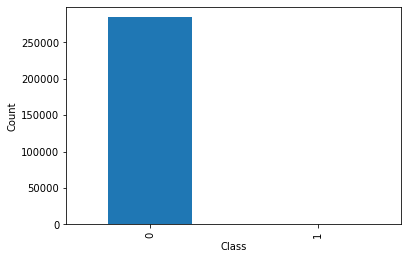

Class
0    284315
1       492
dtype: int64


In [17]:
count_class = data.value_counts(data['Class'])
count_class.plot.bar()
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
print(count_class)

In [30]:
total = data['Class'].value_counts().sum()
class0 = (data[data['Class']==0]).value_counts().sum()
class1 = (data[data['Class']==1]).value_counts().sum()
per_class0 = class0/total * 100
print('No fraud: ',per_class0)
per_class1 = class1/total * 100
print('Fraud: ',per_class1)

No fraud:  99.82725143693798
Fraud:  0.1727485630620034


As we can see the data are highly imbalanced. Class 0 is 99.82% is no fraud and the rest 0.17% are fraud transactions

#### Plot data

In [56]:
X = data.iloc[:,1:29].values
y = data.Class.values

plt.scatter(X[y == 0, 0], X[y == 0, 1], label="No Fraud", alpha=0.5, linewidth=0.15)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

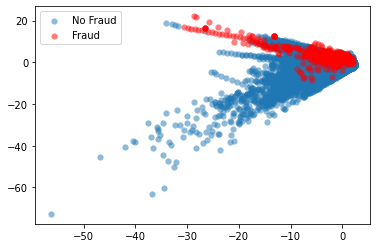

The imbalanced data problem is clear

### Machine Learning Model

In [67]:
#Logistic regression
model = LogisticRegression()

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [79]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [80]:
y_pred = model.predict(X_test)

In [89]:
print('Classification Report:\n', classification_report(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56844
           1       0.94      0.54      0.69       118

    accuracy                           1.00     56962
   macro avg       0.97      0.77      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56840     4]
 [   54    64]]


### Machine Learning Model Using SMOTE Algorithm

In [102]:
smote = BorderlineSMOTE()

In [108]:
X_resampled, y_resampled = smote.fit_resample(X_train,y_train)

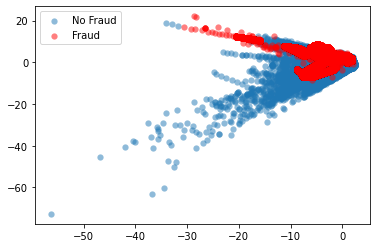

In [109]:
plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="No Fraud", alpha=0.5, linewidth=0.15)
plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Fraud", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

Before and After SMOTE 

In [110]:
pd.value_counts(pd.Series(y))

0    284315
1       492
dtype: int64

In [111]:
pd.value_counts(pd.Series(y_resampled))

0    227471
1    227471
dtype: int64

In [112]:
#fit the model
model.fit(X_resampled,y_resampled)

C:\Users\Nikos Oikonomou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
y_pred = model.predict(X_test)

In [114]:
print('Classification Report:\n', classification_report(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56844
           1       0.21      0.83      0.34       118

    accuracy                           0.99     56962
   macro avg       0.61      0.91      0.67     56962
weighted avg       1.00      0.99      1.00     56962

Confusion Matrix:
 [[56480   364]
 [   20    98]]


We have slightly better prediction in class 'fraud'  but we have higher number in class 'No fraud' due to oversampling method

### RandomForest & DecisionTree using Pipeline

In [138]:
#Random Forest Pipeline
RandomForestPipe = Pipeline([
    ('RF_clf',LogisticRegression())
],verbose=True)

#DecisionTree Pipeline
DecisionTreePipe = Pipeline([
    ('DT_clf',DecisionTreeClassifier())
],verbose=True)

In [139]:
#Define the pipelines in a list
pipesList = [RandomForestPipe,DecisionTreePipe]

In [140]:
#Dictionary
pipeDictionary = {0: 'Random Forest', 1:'Decision Tree'}

#fit the pipelines
for pipe in pipesList:
    pipe.fit(X_resampled,y_resampled) #using SMOTE samples

[Pipeline] ............ (step 1 of 1) Processing RF_clf, total=   3.1s
[Pipeline] ............ (step 1 of 1) Processing DT_clf, total=  43.7s


In [141]:
for i, model in enumerate(pipesList):
    print("{} accuracy score: {}".format(pipeDictionary[i],model.score(X_test,y_test)))

Random Forest accuracy score: 0.9932586636705172
Decision Tree accuracy score: 0.9989466661985184


We figure out that Decision Tree has slightly better acc score than Random Forest in our data